##### Problem Statement:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

##### Hypothesis Generation :


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

- Location of the store affects the sales : 
If Stores located in urban and tier1 cities will have more sales due to the income of the peoples . 
Population of that place will also impact the sales.
Store location in popular mall or marketplace may affect the sales as well.
- Store size affects the sales .
- Sales are higher during weekends .
- Behaviour of all managers and staffs also impact the overall customers satisfaction hence good sales .
- The location of product in a store will impact sales . It should be eye catching to the customers .
- Better advertisement of the products with result more sales .
- Product with exciting offers and discounts will sell more .

##### Loading Packages and Data :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

##### Data Structure and Content:

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print(train_data.shape, test_data.shape)

(8523, 12) (5681, 11)


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train_data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
#performing these 3 lines here because i performed the analysis by dropping the item identifier

In [12]:
train_data['New_Item_Type'] = train_data['Item_Identifier'].apply(lambda x: x[:2])
test_data['New_Item_Type'] = train_data['Item_Identifier'].apply(lambda x: x[:2])

In [13]:
train_data['New_Item_Type'] = train_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
train_data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [14]:
test_data['New_Item_Type'] = test_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
test_data['New_Item_Type'].value_counts()

Food              4113
Non-Consumable    1030
Drinks             538
Name: New_Item_Type, dtype: int64

In [15]:
# Selecting features based on general requirement
train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [16]:
# check for categorical attributes
cat_col = []
for x in train_data.dtypes.index:
    if train_data.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'New_Item_Type']

In [17]:
for col in cat_col:
    print(col)
    print(train_data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6


##### Exploratory Data Analysis :

##### Univariate Analysis :

In [18]:
num_train = train_data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales','Outlet_Establishment_Year']]
cat_train = train_data[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']]

In [19]:
num_test = test_data[['Item_Weight', 'Item_Visibility', 'Item_MRP','Outlet_Establishment_Year']]
cat_test = test_data[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']]

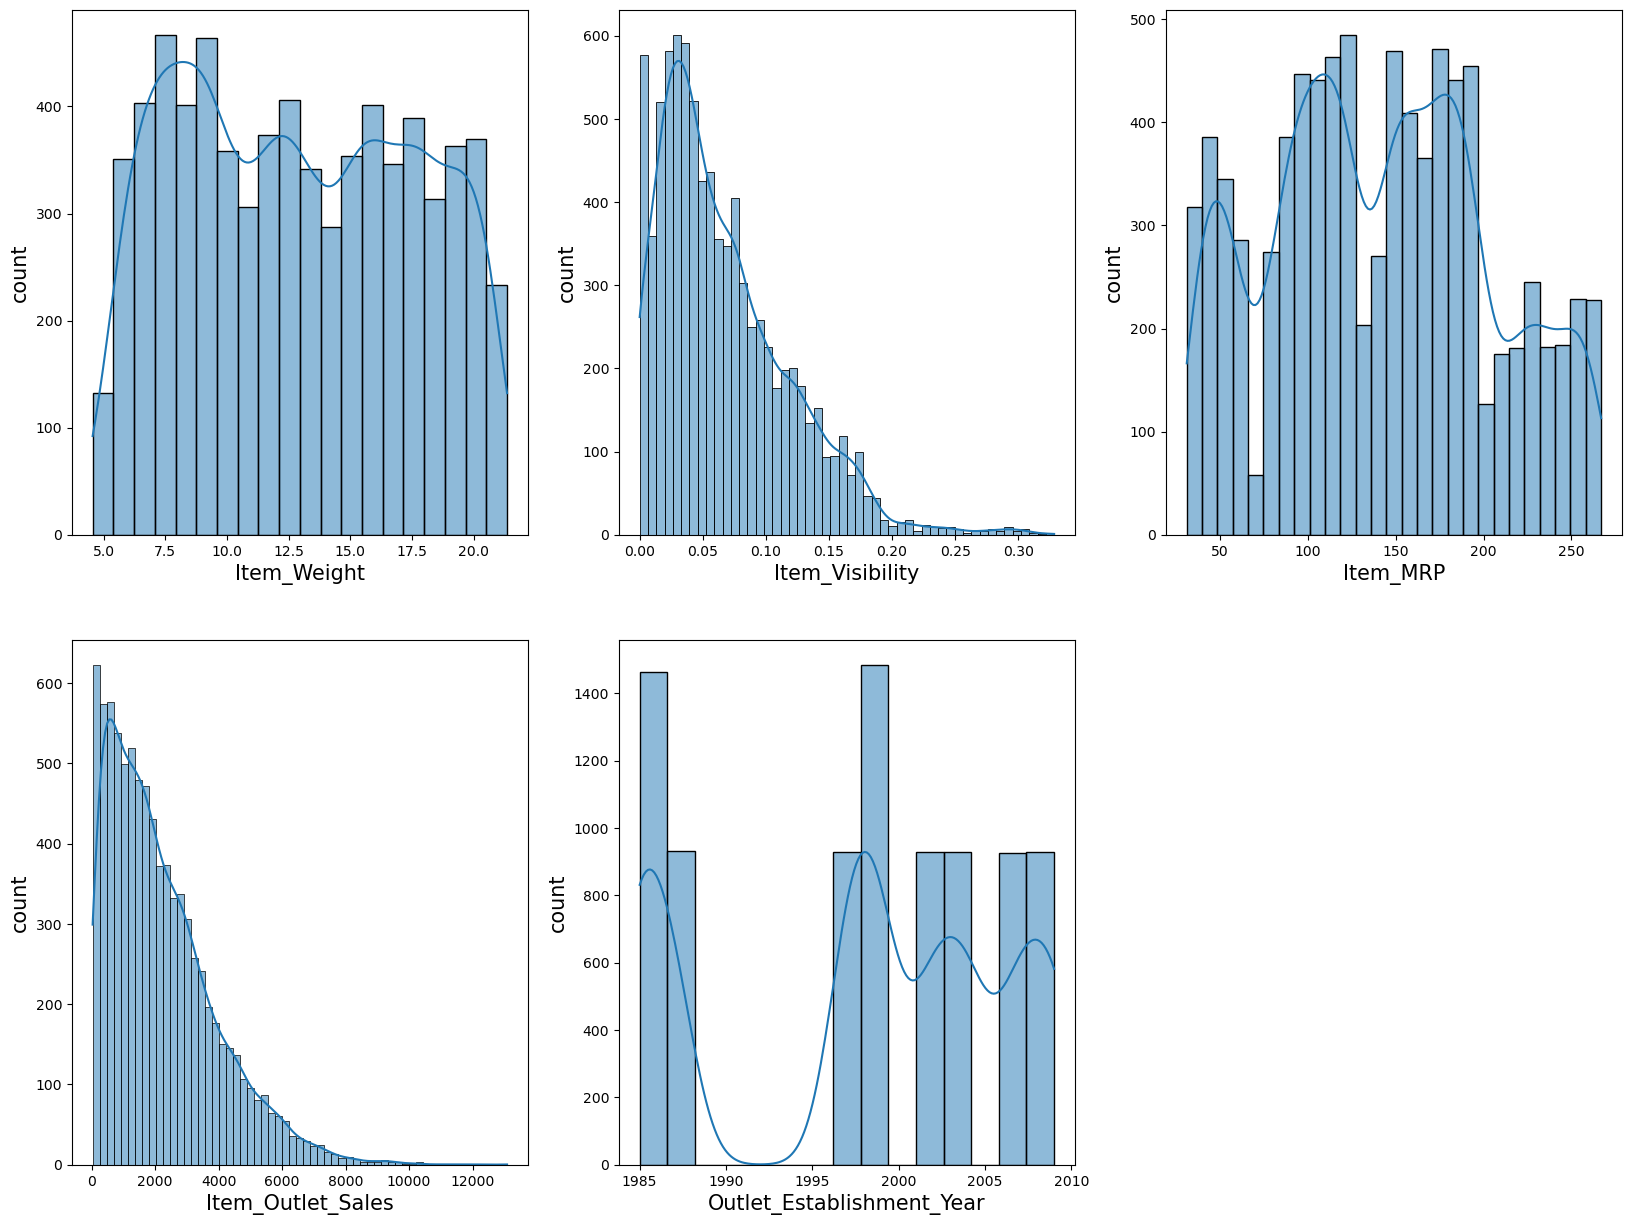

In [20]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in num_train:
    plt.subplot(2,3,plotnumber)
    sns.histplot(data=num_train,x=i,kde=True)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('count',fontsize=15)
    plotnumber+=1

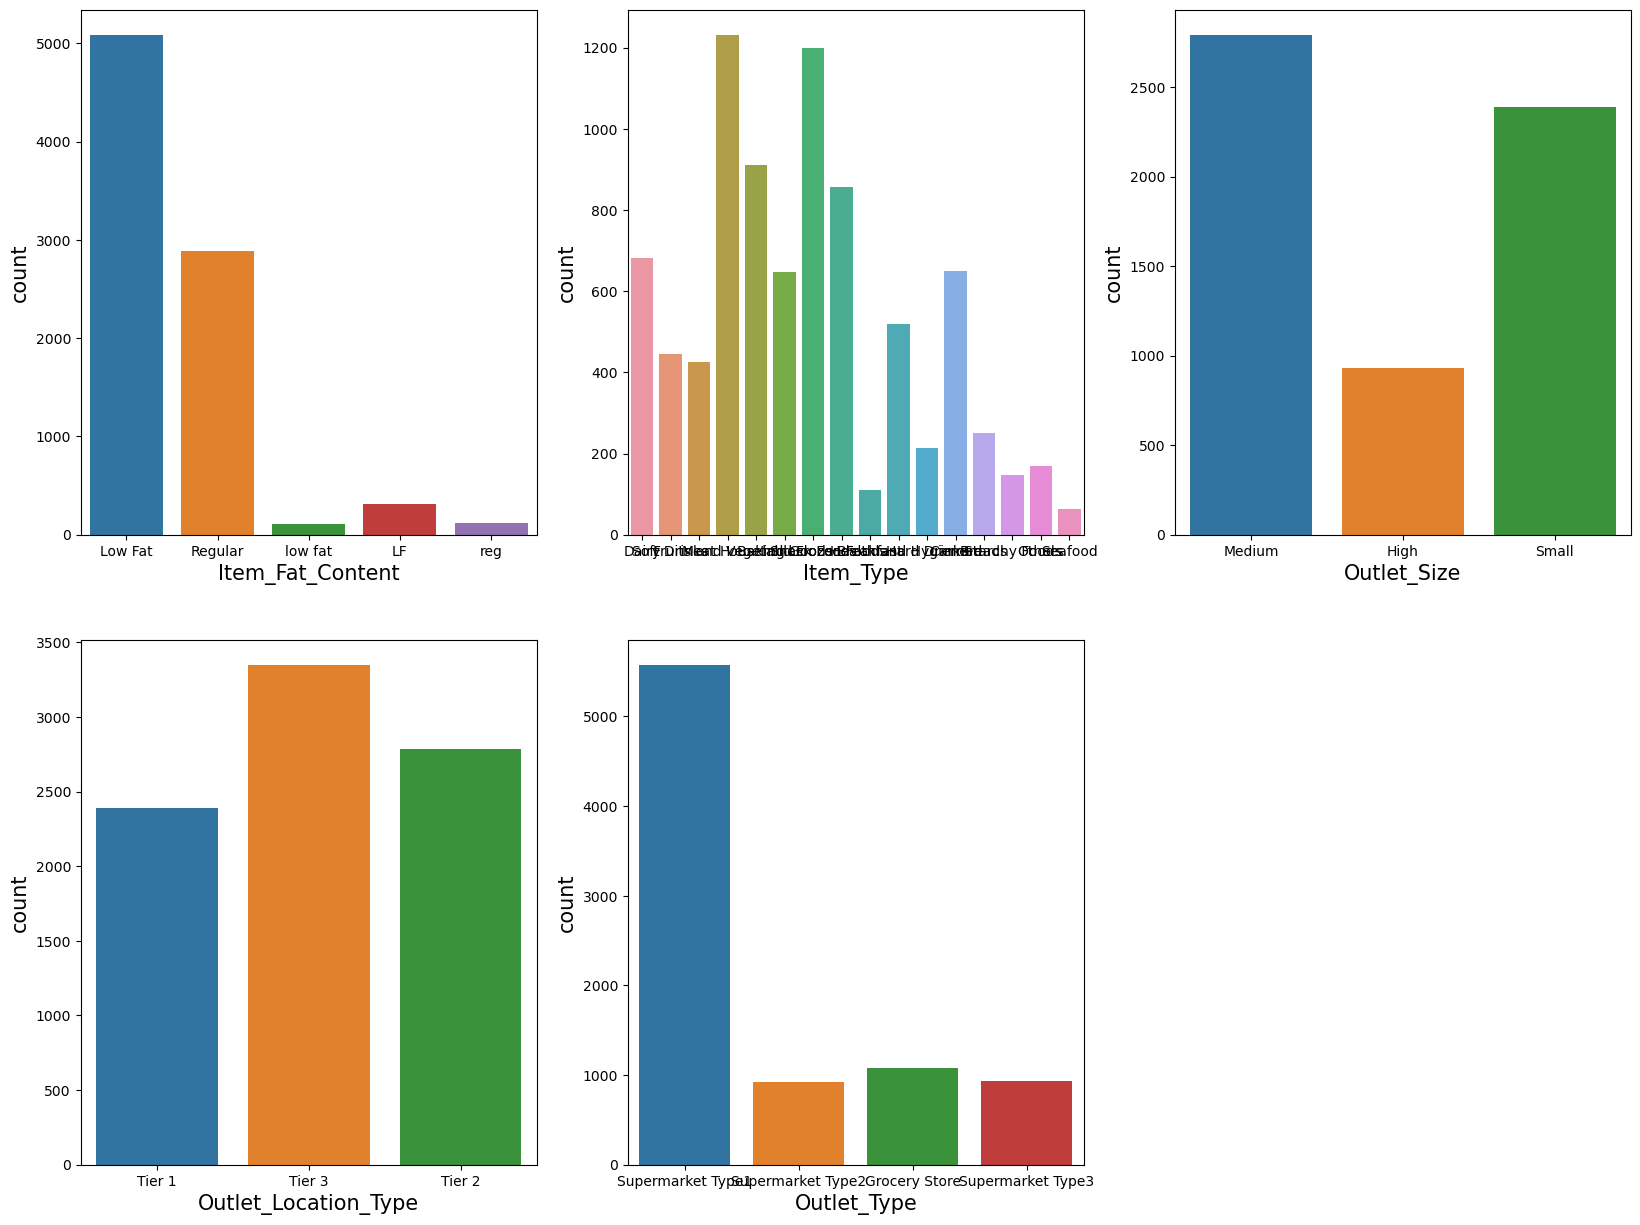

In [21]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in cat_train:
    plt.subplot(2,3,plotnumber)
    sns.countplot(data=cat_train,x=i)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('count',fontsize=15)
    plotnumber+=1

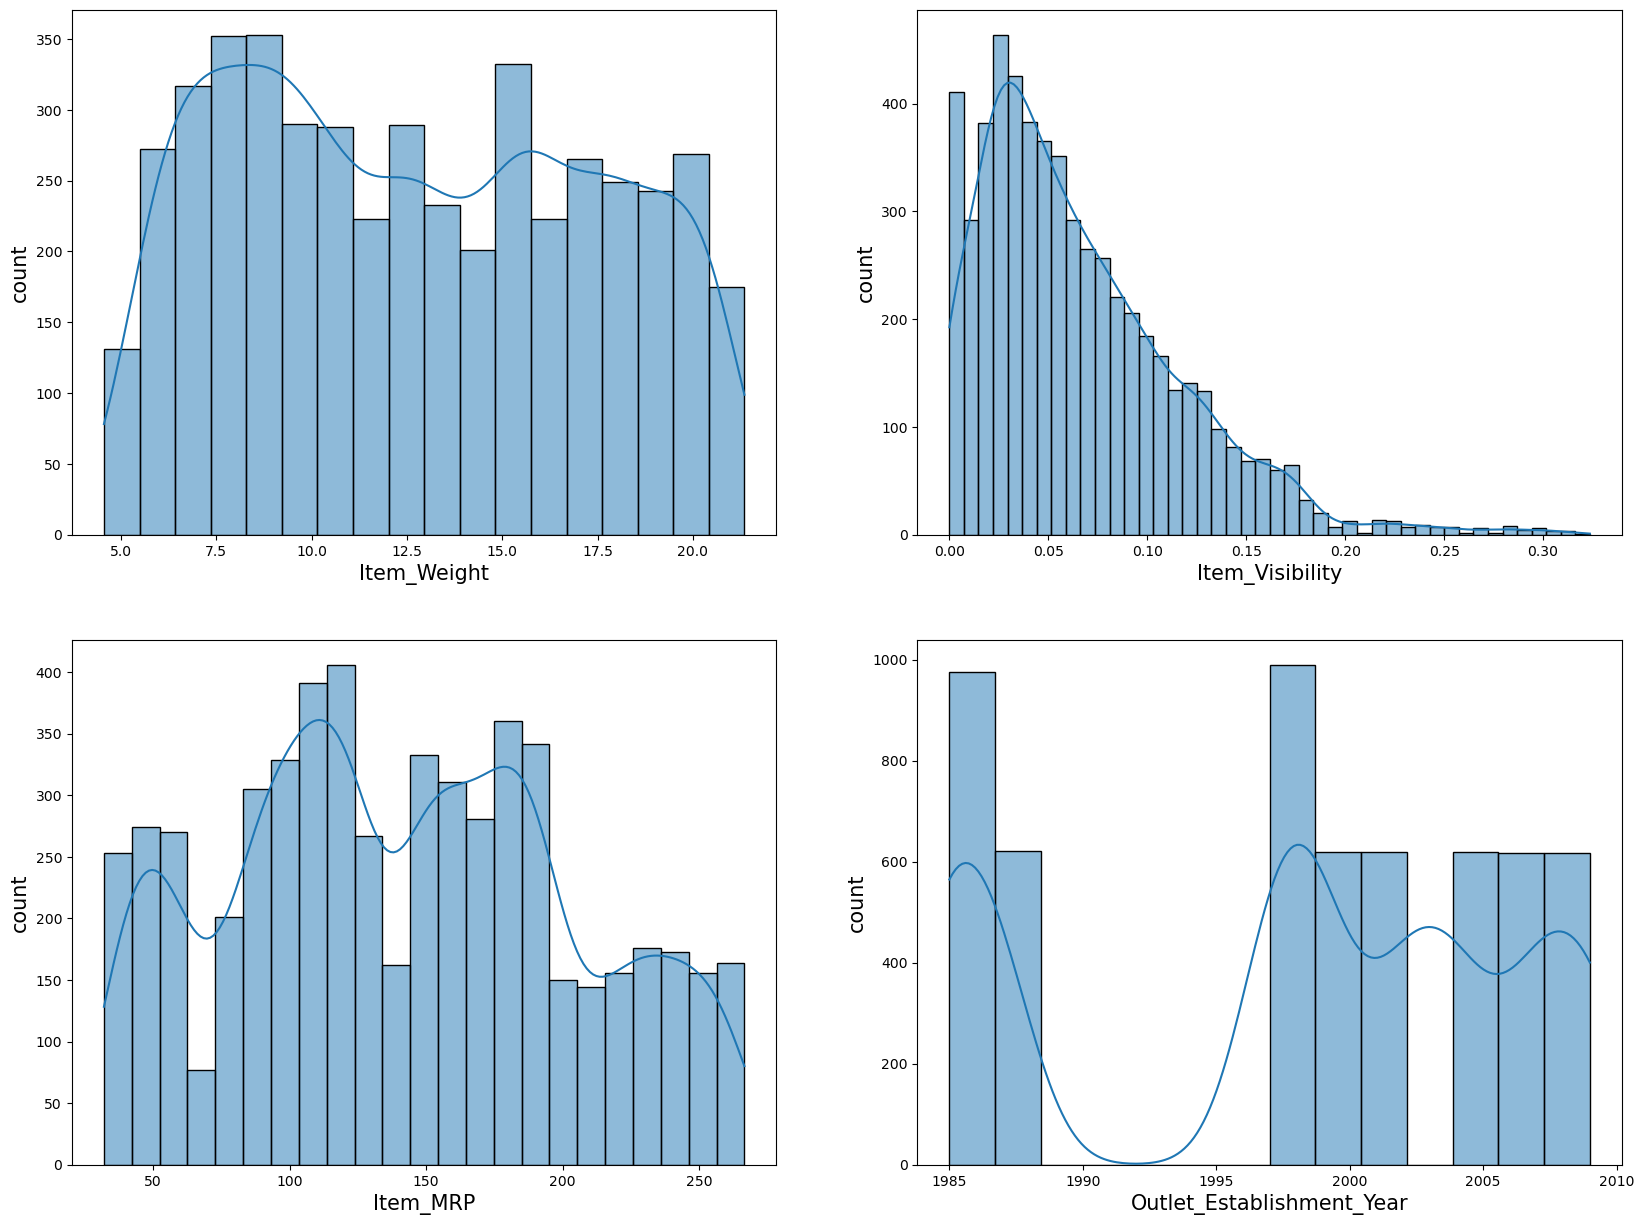

In [22]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in num_test:
    plt.subplot(2,2,plotnumber)
    sns.histplot(data=num_test,x=i,kde=True)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('count',fontsize=15)
    plotnumber+=1

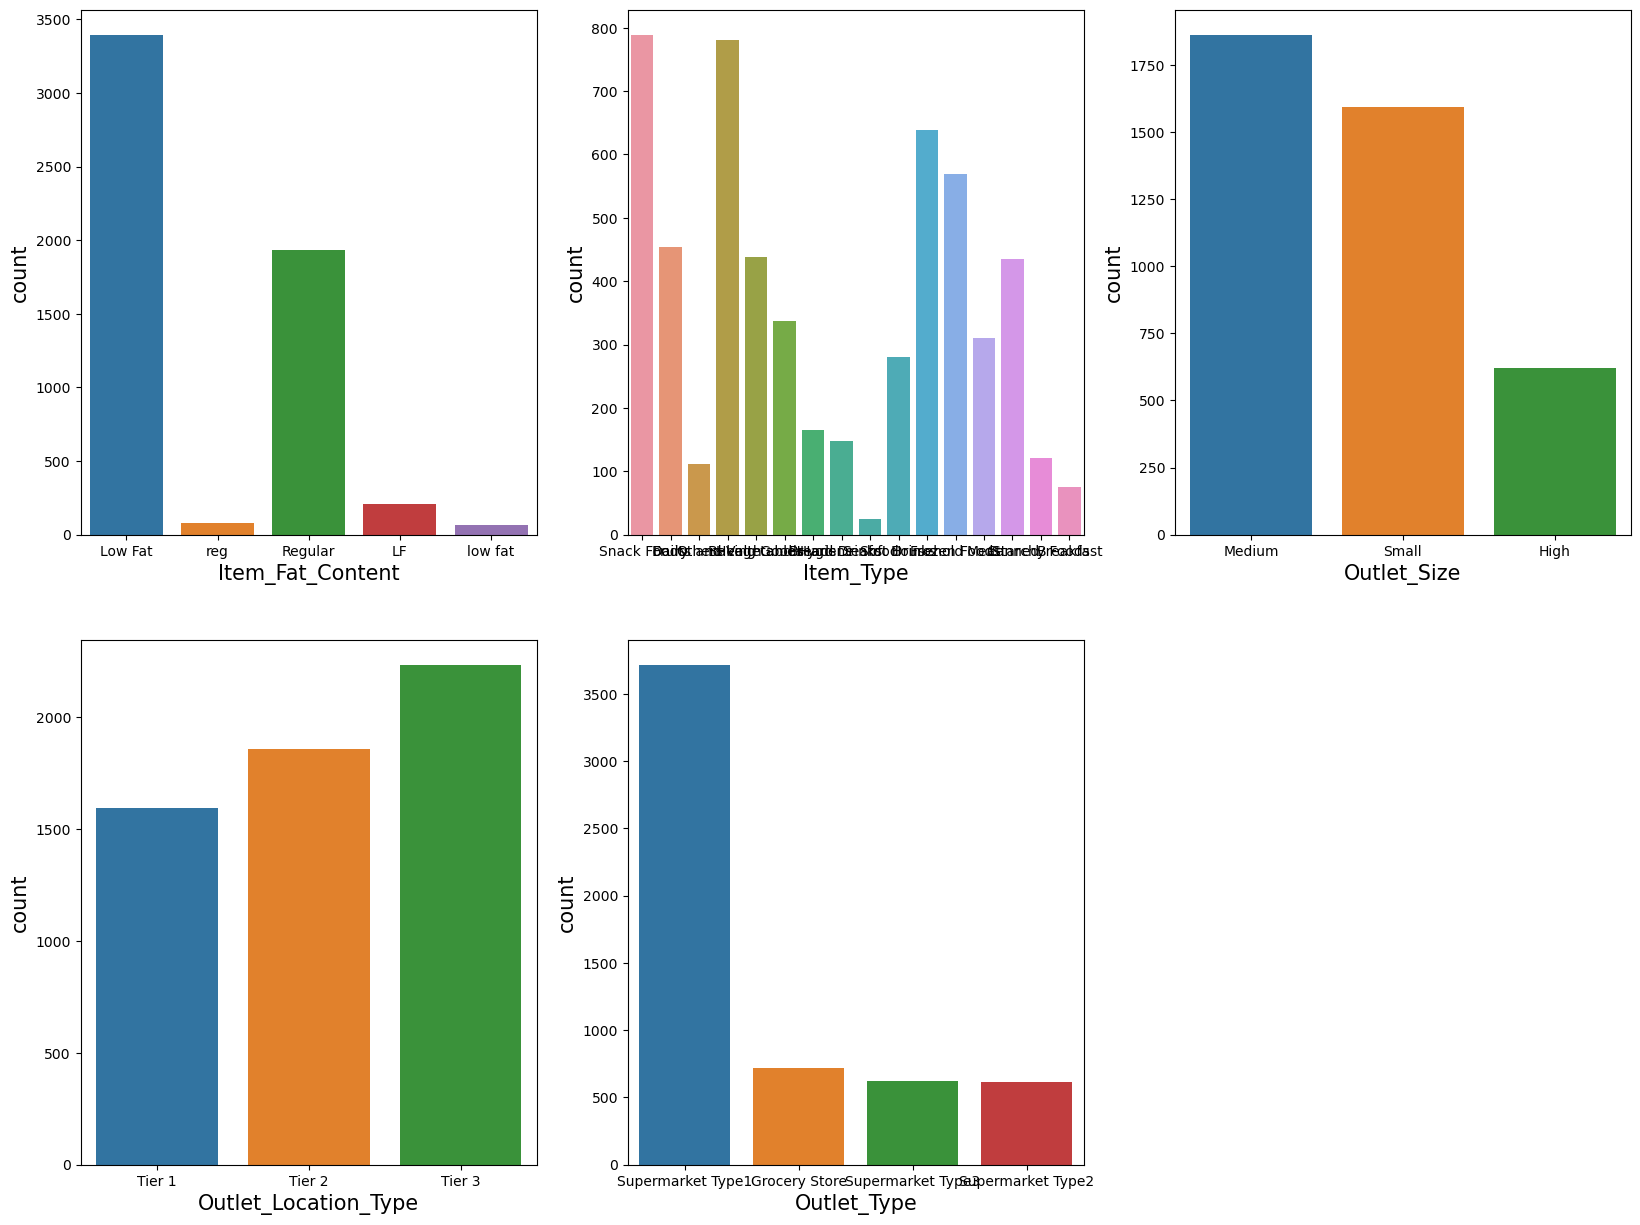

In [23]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in cat_test:
    plt.subplot(2,3,plotnumber)
    sns.countplot(data=cat_test,x=i)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('count',fontsize=15)
    plotnumber+=1

##### Bivariate Analysis :

In [24]:
# Analysis using dtale library

In [25]:
import dtale

In [26]:
dtale.show(train_data)

In [27]:
dtale.show(test_data)

##### Missing Value Treatment :

In [28]:
np.mean(train_data['Item_Weight'])

12.857645184135976

In [29]:
train_data['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [30]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [31]:
train_data.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
2644,16.600000,Low Fat,0.000000,Frozen Foods,54.6614,2007,NaN,Tier 2,Supermarket Type1,884.1824,Food
6937,7.100000,Low Fat,0.110634,Fruits and Vegetables,173.8080,2007,NaN,Tier 2,Supermarket Type1,1211.7560,Food
4559,12.857645,Regular,0.063080,Frozen Foods,175.7712,1985,Small,Tier 1,Grocery Store,351.5424,Food
238,12.857645,LF,0.084555,Snack Foods,109.8912,1985,Medium,Tier 3,Supermarket Type3,2074.6328,Food
3940,12.857645,Low Fat,0.184035,Dairy,42.2138,1985,Small,Tier 1,Grocery Store,40.6138,Drinks


In [32]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [33]:
test_data['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [34]:
train_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [35]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [36]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
 10  New_Item_Type              8523 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
 9   New_Item_Type              5681 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.

Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.

Item_Fat_Content: Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’.

##### Feature Engineering :

In [38]:
# combine item fat content

In [39]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [40]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [41]:
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [42]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [43]:
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [44]:
# replacing item visibility 0 with their mean

In [45]:
sum(train_data['Item_Visibility']==0)

526

In [46]:
np.mean(train_data['Item_Visibility'])

0.06613202877895108

In [47]:
# replace zeros with mean
train_data.loc[:, 'Item_Visibility'].replace([0], [train_data['Item_Visibility'].mean()], inplace=True)
test_data.loc[:, 'Item_Visibility'].replace([0], [test_data['Item_Visibility'].mean()], inplace=True)

In [48]:
test_data['Item_Visibility'].describe()

count    5681.000000
mean        0.069765
std         0.048394
min         0.003591
25%         0.033208
50%         0.062137
75%         0.093463
max         0.323637
Name: Item_Visibility, dtype: float64

In [49]:
train_data['Item_Visibility'].describe()

count    8523.000000
mean        0.070213
std         0.048742
min         0.003575
25%         0.033085
50%         0.062517
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [50]:
# create small values for establishment year
train_data['Outlet_Years'] = 2013 - train_data['Outlet_Establishment_Year']
test_data['Outlet_Years'] = 2013 - test_data['Outlet_Establishment_Year']

In [51]:
train_data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4


##### Encoding Categorical Variables

##### Label Encoding:

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
var = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
le = LabelEncoder()
for i in var:
    train_data[i] = le.fit_transform(train_data[i])

In [54]:
train_data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,Food,14
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,Drinks,4


In [55]:
var2 = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']
le = LabelEncoder()
for i in var2:
    test_data[i] = le.fit_transform(test_data[i])

In [56]:
test_data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Years
0,20.75,0,0.007565,13,107.8622,1999,1,0,1,Food,14
1,8.30,1,0.038428,4,87.3198,2007,1,1,1,Drinks,6


##### One hot Encoding :

In [57]:
train_data = pd.get_dummies(train_data, columns=['New_Item_Type'])
train_data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,14,0,1,0
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228,4,1,0,0


In [58]:
test_data = pd.get_dummies(test_data, columns=['New_Item_Type'])
test_data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,20.75,0,0.007565,13,107.8622,1999,1,0,1,14,0,1,0
1,8.30,1,0.038428,4,87.3198,2007,1,1,1,6,1,0,0


##### PreProcessing Data :

<Axes: >

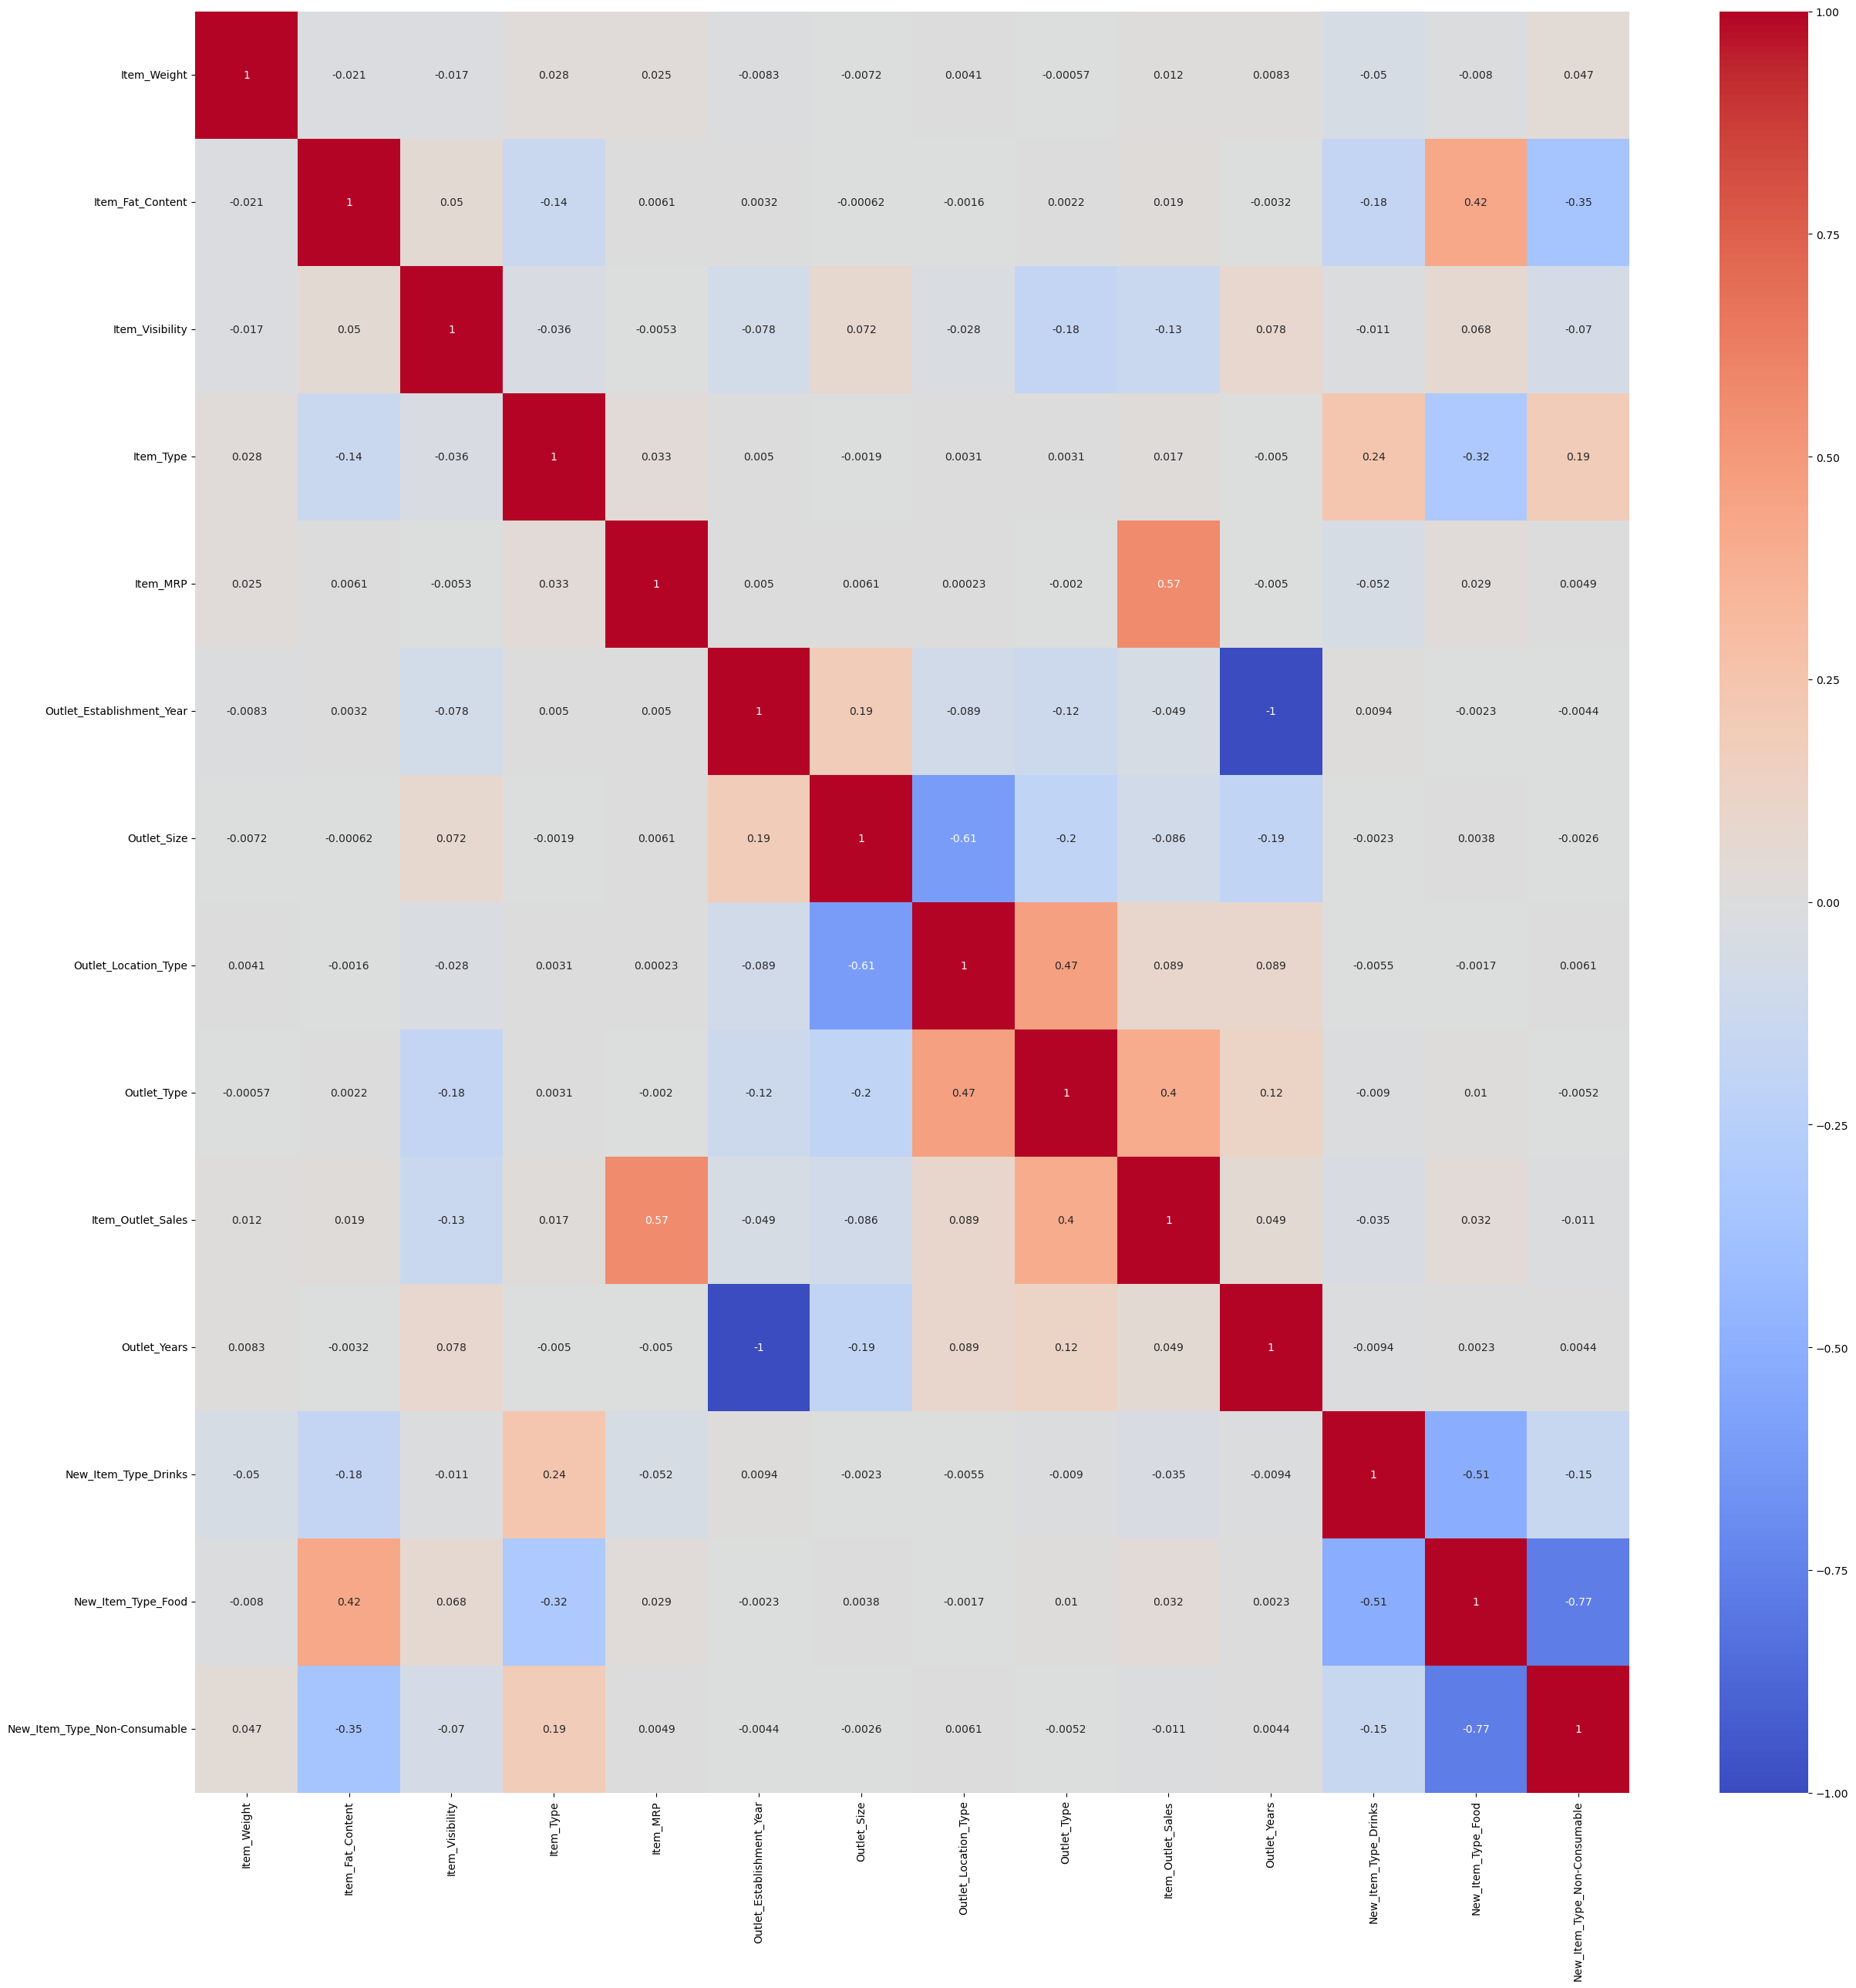

In [59]:
plt.figure(figsize=(30,30))
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Let’s examine the correlated features of train dataset. Correlation varies from -1 to 1.

- negative correlation: < 0 and >= -1
- positive correlation: > 0 and <= 1
- no correlation: 0

In [60]:
X = train_data.drop(columns=['Item_Outlet_Sales'])
Y = train_data['Item_Outlet_Sales']

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=42, test_size=0.20)

Standardization

In [62]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [63]:
X_train_std= sc.fit_transform(X_train)

In [64]:
X_test_std= sc.transform(X_test)

In [65]:
X_train_std

array([[-0.80021083,  1.34421592, -0.72209395, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [ 1.21131742, -0.74392811, -0.46924454, ..., -0.3215817 ,
        -1.59085293,  2.06811261],
       [ 1.11665727,  1.34421592,  0.12125412, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       ...,
       [ 1.11665727, -0.74392811, -1.05728572, ..., -0.3215817 ,
        -1.59085293,  2.06811261],
       [ 1.76744582, -0.74392811, -0.32723892, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [ 0.82084429, -0.74392811, -1.09748808, ..., -0.3215817 ,
        -1.59085293,  2.06811261]])

In [66]:
X_test_std

array([[ 0.33571101, -0.74392811, -0.90566327, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [-1.17175193, -0.74392811,  0.01848493, ..., -0.3215817 ,
        -1.59085293,  2.06811261],
       [ 0.38304109,  1.34421592, -0.59621128, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       ...,
       [ 0.38304109,  1.34421592, -0.59824065, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [-0.72921571,  1.34421592,  1.46229327, ..., -0.3215817 ,
         0.62859362, -0.48353266],
       [-1.17766819, -0.74392811, -0.31207408, ..., -0.3215817 ,
         0.62859362, -0.48353266]])

In [67]:
#Y_train

In [68]:
#Y_test

##### Modeling :

##### Linear Regression :

In [69]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [70]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [71]:
Y_pred_lr=lr.predict(X_test_std)

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5248165342198401
855.3204199424762
1136.4569662515455


##### Regularized Linear Regression :

In [74]:
from sklearn.linear_model import Lasso
lar = Lasso()

In [75]:
lar.fit(X_train_std,Y_train)

Lasso()

In [76]:
Y_pred_lr=lar.predict(X_test_std)

In [77]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5248319222858505
854.9844168392787
1136.4385649206326


##### RandomForest :

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [79]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [80]:
Y_pred_rf= rf.predict(X_test_std)

In [81]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5696670443345746
754.4959934065688
1081.495303816585


##### XGBoost :

In [82]:
import xgboost as xg

In [83]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 

In [84]:
xgb_r.fit(X_train_std,Y_train) 

[17:00:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [85]:
pred = xgb_r.predict(X_test_std)

In [86]:
print(r2_score(Y_test,pred))
print(mean_absolute_error(Y_test,pred))
print(np.sqrt(mean_squared_error(Y_test,pred)))

0.6057420914737662
719.3393710040837
1035.1720600466463


Creating a pickle file so we can use to test our model .

In [87]:
import pickle
# open a file, where you want to store the data
file = open('big_mart.pkl', 'wb')

# dump information to that file
pickle.dump(xgb_r, file)

In [88]:
model = open('big_mart.pkl','rb')
forest = pickle.load(model)

In [89]:
y_prediction = forest.predict(X_test_std)

In [90]:
from sklearn import metrics

In [91]:
metrics.r2_score(Y_test, y_prediction)

0.6057420914737662

##### Summary :

Among all the models we have trained we are getting a higher r2 score on xgboost regressor that is 60.57 . So we are considering it .
Further we will take a look on this and make some more changes and improve the model.